> FIAP - Redes Neurais Artificiais, Deep Learning e Algoritmos Genéticos

# Aula 03 - Trabalhando com Perceptron

## Implementação de um Perceptron simples


In [9]:
# Definir a função de agregação de informação (soma poderada)

from functools import reduce


def sum_data(data: tuple[dict[str, float]]):
    return reduce(lambda total, current: total + (current['value'] * current['weight']), data, 0)

# Tests


total_sum = sum_data([{'value': 1, 'weight': 0.10},
                     {'value': 10, 'weight': 0.05}])

assert total_sum == 0.6, "The sum should equal 0.6"


In [10]:
# Definir a função de ativação: FUNÇÃO DEGRAU

def threshold_function(total_sum: float, bias: float):
    threshold = total_sum + bias

    if threshold < 0:
        return 0

    return 1

# Tests


assert threshold_function(0.6, bias=0) == 1, "Should be 1 = neuron ON"
assert threshold_function(0.2, bias=-1) == 0, "Should be 0 = neuron OFF"


## Casos de aplicação do perceptron

Vamos analisar a base `escolha_faculdade.csv` com exemplos de faculdades identificadas pelo ID e com um conjunto de variáveis que as descrevem. As variáveis são:

| Nome                 | Descrição                                                                           | Possíveis valores                                                                                 | Peso  |
| -------------------- | ----------------------------------------------------------------------------------- | ------------------------------------------------------------------------------------------------- | ----- |
| reconhecida_MEC      | A faculdade é reconhecida pelo MEC?                                                 | 1 = Sim; 0 = Não                                                                                  | 0.1   |
| facilidade_pagamento | A faculdade apresenta facilidades para pagamento?                                   | 1 = Sim; 0 = Não                                                                                  | 0.05  |
| flexibilidade_ensino | O quão flexível é o método de ensino?                                               | 1 = Somente presencial; 2= Somente EAD; 3 = Misto                                                 | 0.05  |
| entrada_mercado      | O que a faculdade oferece para facilitar a entrada do aluno no mercado de trabalho? | 0 = Sem suporte; 1 = Feiras; 2 = Feiras e estágios; 3 = Feiras, estágios e convênios com empresas | 0.2   |
| score_infraestrutura | Qual nota de 0 a 100 a escola possui para sua infraestrutura?                       | De 0 a 100                                                                                        | 0.002 |
| empregabilidade      | Qual a porcentagem de alunos ingressos empregados?                                  | De 0 a 1                                                                                          | 0.30  |
| acesso_facil         | A localização possui fácil acesso?                                                  | 1 = Sim; 0 = Não                                                                                  | 0.05  |


In [11]:
# Pesos já fornecidos
pesos = {
    'reconhecida_MEC': 0.1,
    'facilidade_pagamento': 0.05,
    'flexibilidade_ensino': 0.05,
    'entrada_mercado': 0.2,
    'score_infraestrutura': 0.002,
    'empregabilidade': 0.3,
    'acesso_facil': 0.05
}


Demonstração básica da nossa base de dados: `escolha_faculdade.csv`


In [12]:
import pandas as pd

df = pd.read_csv("data/escolha_faculdade.csv", index_col="ID")

df.head()


,reconhecida_MEC,facilidade_pagamento,flexibilidade_ensino,entrada_mercado,score_infraestrutura,empregabilidade,acesso_facil
ID,,,,,,,
1,1,1,2,1,70,0.60,1
150,1,1,1,2,60,0.50,0
200,1,1,1,1,40,0.20,0
172,1,0,1,3,20,0.80,1
2,0,1,3,1,50,0.15,0


Vamos pegar a base de dados e incluir os pesos e valores formatando como necessário pela nossa função `sum_data`


In [13]:
data = []

for row in df.iloc:
    values_with_weight = []

    for column_name, value in row.to_dict().items():
        values_with_weight.append({
            'column_name': column_name,  # for debug
            'value': value,
            'weight': pesos[column_name],

        })

    data.append({'id': row.name, 'data': values_with_weight})


Agora temos uma lista com todas as linhas da nossa base de dados no formato que precisamos para usar a nossa função `sum_data`


In [14]:
pd.DataFrame(data[0]['data'])


,column_name,value,weight
0,reconhecida_MEC,1.0,0.100
1,facilidade_pagamento,1.0,0.050
2,flexibilidade_ensino,2.0,0.050
3,entrada_mercado,1.0,0.200
4,score_infraestrutura,70.0,0.002
5,empregabilidade,0.6,0.300
6,acesso_facil,1.0,0.050


Com isso, podemos executar nosso Perceptron:


In [15]:
result = []
bias = -0.75

for row in data:
    total_row_sum = sum_data(row['data'])

    neuron_activation = threshold_function(total_row_sum, bias)

    result.append({
        'id': row['id'],
        'Soma total': total_row_sum,
        'bias': bias,
        'f(x)': total_row_sum + bias,
        'Neurônio ativo?': neuron_activation
    })

result_df = pd.DataFrame(result).set_index('id')

result_df


,Soma total,bias,f(x),Neurônio ativo?
id,,,,
1,0.820,-0.75,0.070,1
150,0.870,-0.75,0.120,1
200,0.540,-0.75,-0.210,0
172,1.080,-0.75,0.330,1
2,0.545,-0.75,-0.205,0


Com isso, podemos gerar um gráfico mostrando a quantidade de faculdades que são propícias a serem escolhidas.


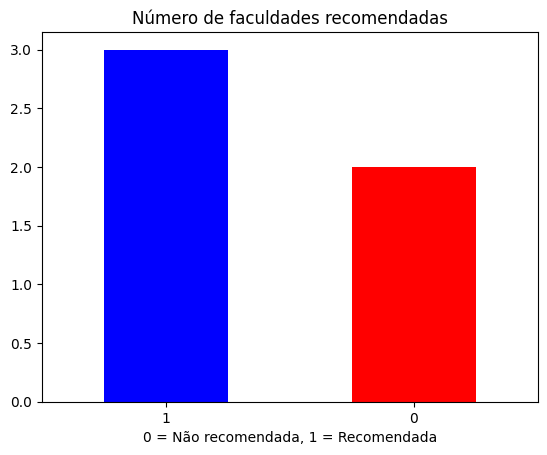

In [16]:
result_plot = result_df['Neurônio ativo?'].value_counts().plot(
    kind='bar',
    title="Número de faculdades recomendadas",
    color=['blue', 'red'],
    xlabel='0 = Não recomendada, 1 = Recomendada',
    rot=0,
)
